# Add Model Architechure in the code block below

In [1]:
import torch
from torch import nn


In [2]:

class Model(nn.Module):
    def __init__(self,inputSize):
        super().__init__()

        self.nnBlock1 = nn.Sequential(
                nn.Conv2d(in_channels=inputSize,out_channels=40,kernel_size=(8,1),padding=0),
                nn.BatchNorm2d(40),
                
                nn.Conv2d(in_channels=40,out_channels=40,kernel_size=(8,1),padding=0),
                nn.BatchNorm2d(40),
                
                nn.MaxPool2d(1,160),
                

                
                nn.ReLU(),
                #nn.MaxPool2d(kernel_size=(4,3),stride=(1,3)),
        )    
        
        self.nnBlock2 = nn.Sequential(
                nn.Conv2d(in_channels=80,out_channels=80,kernel_size=(1,3),padding=0,stride = 1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=(1,3),stride=(1,3))
        )    
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=160,out_features=100),
            #nn.Linear(in_features=5000,out_features=5000),
            nn.Linear(in_features=100,out_features=50)
        )
        
    def forward(self, x):
        x = self.nnBlock1(x)
        #x = self.nnBlock2(x)
        x = self.classifier(x)
        return x
    

In [3]:
N = 20;C = 3;H=498;W = 13
viz_model = Model(C)

In [4]:
from torchinfo import summary

print(summary(viz_model, input_size=(N,C,H,W), col_names =["input_size","output_size","kernel_size","num_params","params_percent","mult_adds","trainable"]))

Layer (type:depth-idx)                   Input Shape               Output Shape              Kernel Shape              Param #                   Param %                   Mult-Adds                 Trainable
Model                                    [20, 3, 498, 13]          [20, 50]                  --                        19,280                     35.42%                   --                        True
├─Sequential: 1-1                        [20, 3, 498, 13]          [20, 40, 4, 1]            --                        --                             --                   --                        True
│    └─Conv2d: 2-1                       [20, 3, 498, 13]          [20, 40, 491, 13]         [8, 1]                    1,000                       1.84%                   127,660,000               True
│    └─BatchNorm2d: 2-2                  [20, 40, 491, 13]         [20, 40, 491, 13]         --                        80                          0.15%                   1,600           

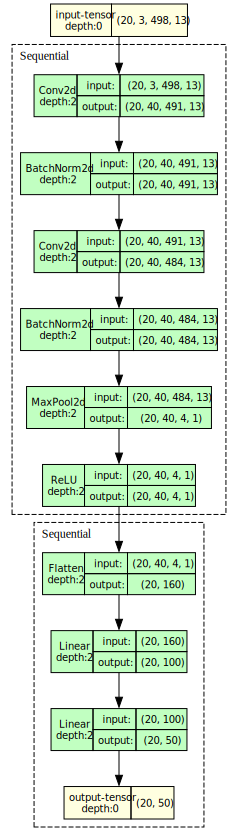

In [5]:

#Summary: Plot The Model Structure & Sizes
from torchview import draw_graph

input_data = torch.randn(N,C,H,W)
model_graph = draw_graph(viz_model,input_data,expand_nested=True, roll=True,graph_name='MLP',hide_inner_tensors=True,hide_module_functions=True)
model_graph.visual_graph

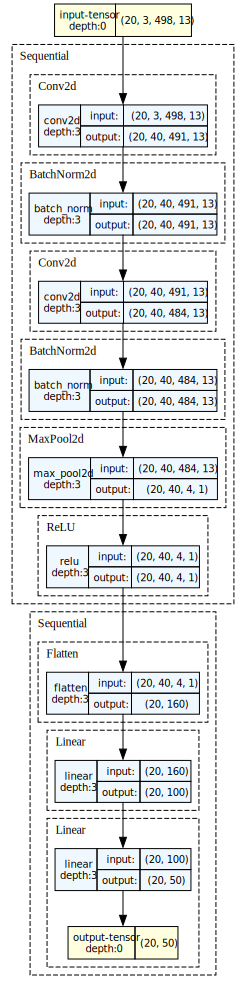

In [6]:
model_graph = draw_graph(viz_model,input_data,expand_nested=True, roll=True,graph_name='MLP',hide_inner_tensors=True,hide_module_functions=False)
model_graph.visual_graph